# Mann-Whitney U Test

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

def import_csv(file):
    return pd.read_csv(file)

path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data = import_csv(path)


In [12]:
# Seleccionamos las columnas necesarias 
data_clean = data[['dic_micromol_kg', 'temp_c', 'season']].dropna()

# Separar grupos
dry_dic = data_clean[data_clean['season'] == 'Dry']['dic_micromol_kg']
rainy_dic = data_clean[data_clean['season'] == 'Rainy']['dic_micromol_kg']

dry_temp = data_clean[data_clean['season'] == 'Dry']['temp_c']
rainy_temp = data_clean[data_clean['season'] == 'Rainy']['temp_c']

In [9]:
alpha = 0.05
results = []

variables = [
    ('dic_micromol_kg', dry_dic, rainy_dic, "DIC (μmol/kg)"),
    ('temp_c', dry_temp, rainy_temp, "Temperatura (°C)")
]

for var_name, group1, group2, pretty_name in variables:
    # Realizar prueba Mann-Whitney U
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    
    # Interpretar resultado
    if p_value < alpha:
        conclusion = "diferencia significativa"
    else:
        conclusion = "no hay diferencia significativa"
    
    # Guardar resultados
    results.append({
        'Variable': var_name,
        'Estadístico U': round(stat, 2),
        'Valor p': round(p_value, 4),
        'Conclusión': conclusion
    })
    
    # Imprimir resultados
    print(f"Prueba Mann-Whitney U - {pretty_name}")
    print(f"  Grupo 'Dry': n = {len(group1)}, mediana = {np.median(group1):.2f}")
    print(f"  Grupo 'Rainy': n = {len(group2)}, mediana = {np.median(group2):.2f}")
    print(f"  U = {stat:.2f}, p = {p_value:.4f}")
    print(f"  → {conclusion}\n")

# Convertir resultados a DataFrame (opcional, para guardar o mostrar)
results_df = pd.DataFrame(results)
print("Resumen de resultados:")
print(results_df)

Prueba Mann-Whitney U - DIC (μmol/kg)
  Grupo 'Dry': n = 72, mediana = 2726.00
  Grupo 'Rainy': n = 34, mediana = 2355.50
  U = 1942.50, p = 0.0000
  → diferencia significativa

Prueba Mann-Whitney U - Temperatura (°C)
  Grupo 'Dry': n = 72, mediana = 26.51
  Grupo 'Rainy': n = 34, mediana = 27.12
  U = 551.00, p = 0.0000
  → diferencia significativa

Resumen de resultados:
          Variable  Estadístico U  Valor p                Conclusión
0  dic_micromol_kg         1942.5      0.0  diferencia significativa
1           temp_c          551.0      0.0  diferencia significativa


In [13]:
results_df.to_csv('resultados_mann_whitney.csv', index=False)

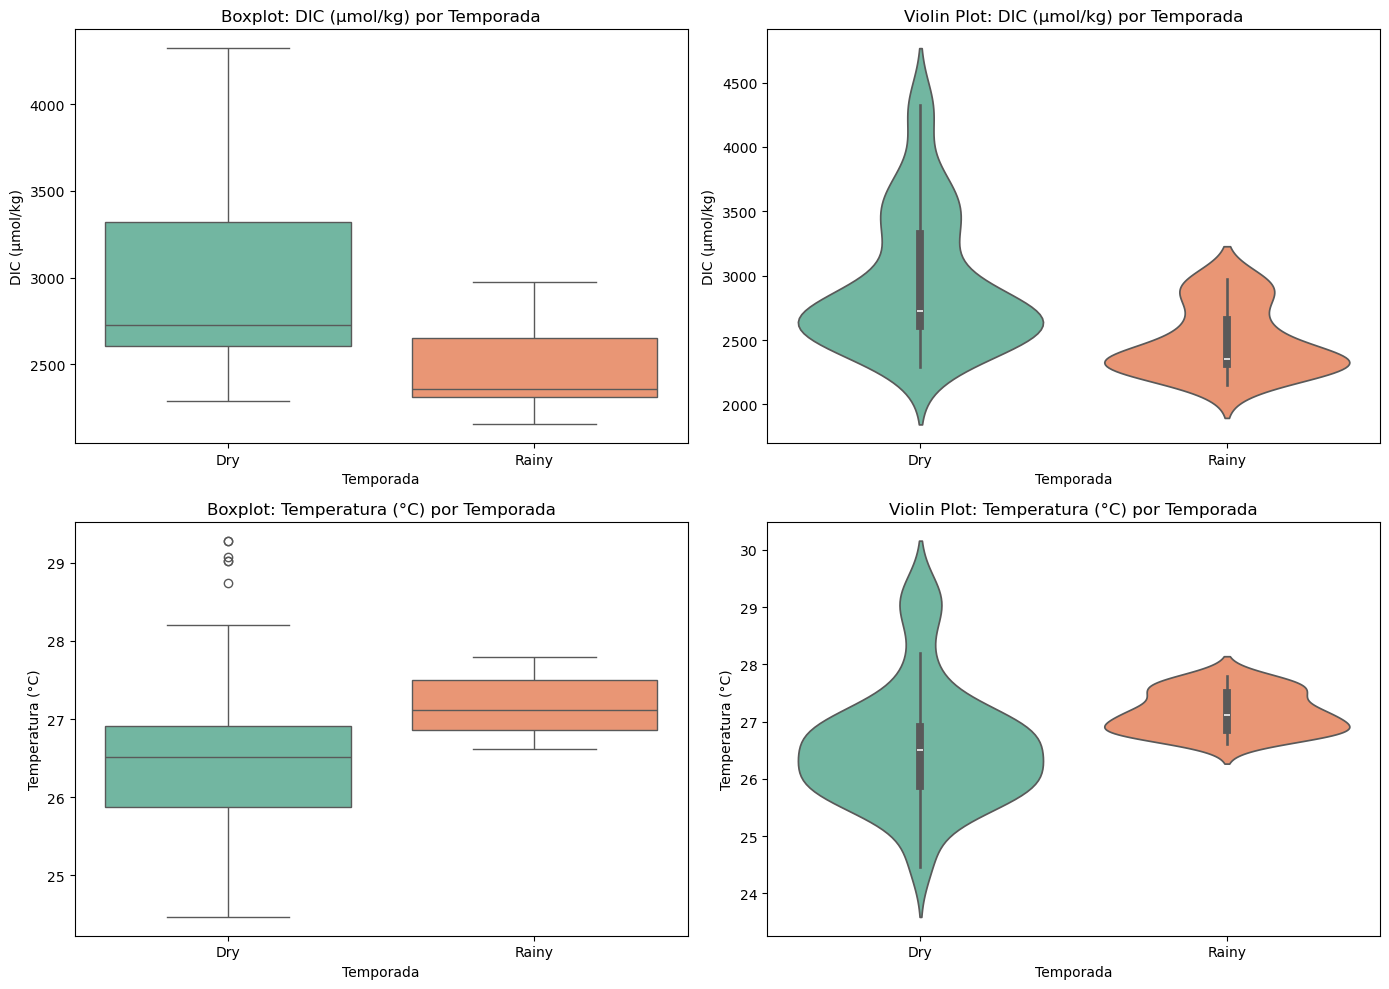

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
variables_plot = ['dic_micromol_kg', 'temp_c']
titles = ['DIC (μmol/kg)', 'Temperatura (°C)']

for i, var in enumerate(variables_plot):
    # Boxplot 
    sns.boxplot(data=data_clean, x='season', y=var, ax=axes[i, 0], palette="Set2", 
                hue='season', legend=False) # Cambios por proxima mejora
    axes[i, 0].set_title(f'Boxplot: {titles[i]} por Temporada', fontsize=12)
    axes[i, 0].set_ylabel(titles[i])
    axes[i, 0].set_xlabel('Temporada')

    # Violin Plot 
    sns.violinplot(data=data_clean, x='season', y=var, ax=axes[i, 1], palette="Set2", 
                   hue='season', legend=False) # Cambios por proxima mejora
    axes[i, 1].set_title(f'Violin Plot: {titles[i]} por Temporada', fontsize=12)
    axes[i, 1].set_ylabel(titles[i])
    axes[i, 1].set_xlabel('Temporada')

plt.tight_layout()
plt.show()